In [3]:
import os
import cv2
import random
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [4]:
DATA_DIR = os.path.join('..', 'data')

In [6]:
os.listdir(DATA_DIR)

['data.yaml', 'README.dataset.txt', 'README.roboflow.txt', 'test', 'train']

In [19]:
TEST_DIR = os.path.join(DATA_DIR, 'test')
TEST_DIR

'..\\data\\test'

In [20]:
IMAGES = os.listdir(os.path.join(TEST_DIR, 'images'))

In [21]:
IMAGES[:5]

['-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg_jpg.rf.c0e910048c7e4984477365e8dcb6ccb2.jpg',
 '0ad90195-cd77-489e-bf85-08c83b80d3e0_jpg.rf.99450277941b6d2f9bedf26873fcc19a.jpg',
 '1125506397_15801322206131n_jpg.rf.9ef52afdeb57ca43db498140ad8fbb70.jpg',
 '1196686205_jpg_14_jpg.rf.9513daaeca364dfca45614a13a33c728.jpg',
 '1288788-une-employee-aide-des-voyageurs-en-provenance-de-chine-le-26-janvier-2020-a-l-aeroport-de-roissy_jpg.rf.128b24e9e1a2e28947ee58042fd4344b.jpg']

In [22]:
def get_random_data():
    filename = random.choice(IMAGES)[:-4]

    image = os.path.join(TEST_DIR, 'images', filename + '.jpg')
    label = os.path.join(TEST_DIR, 'labels', filename + '.txt')

    return image, label

In [30]:
def convert_yolo_coord(box):
    x, y, w, h = list(map(float, box))
    x1 = x - w / 2
    y1 = y - h / 2
    x2 = x + w / 2
    y2 = y + h / 2

    return x1, y1, x2, y2

In [36]:
def plot_image(image, boxes=[]):
    if len(boxes) == 0:
        return image

    for xmin, ymin, xmax, ymax in boxes:
        image = cv2.rectangle(
            image, 
            tuple(np.multiply([xmin, ymin], image.shape[0:2]).astype('int')), 
            tuple(np.multiply([xmax, ymax], image.shape[0:2]).astype('int')), 
            (0, 255, 0), 3)
    return image

In [23]:
model = YOLO('../train/weights/best.pt')

In [24]:
model.info()

YOLOv8n summary: 225 layers, 3011043 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011043, 0, 8.1941504)

In [43]:
image, label = get_random_data()
image, label

('..\\data\\test\\images\\PXL_20210930_151849553_jpg.rf.0875882a7d0f487d7e0b27492065d360.jpg',
 '..\\data\\test\\labels\\PXL_20210930_151849553_jpg.rf.0875882a7d0f487d7e0b27492065d360.txt')


image 1/1 D:\Programming\Projects\Face Detection YOLOv8\notebook\..\data\test\images\no-mask_mov-21_jpg.rf.c4412e64f663cbc35f1029a1d7bbdca4.jpg: 640x640 1 face, 364.0ms
Speed: 16.0ms preprocess, 364.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


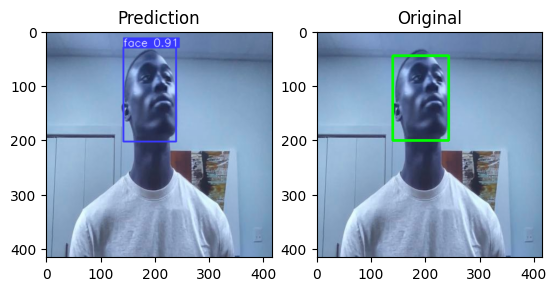


image 1/1 D:\Programming\Projects\Face Detection YOLOv8\notebook\..\data\test\images\phplpE73q_jpg.rf.911674a2bcbbaf7c88d2bb262be76bc1.jpg: 640x640 49 faces, 487.0ms
Speed: 12.0ms preprocess, 487.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


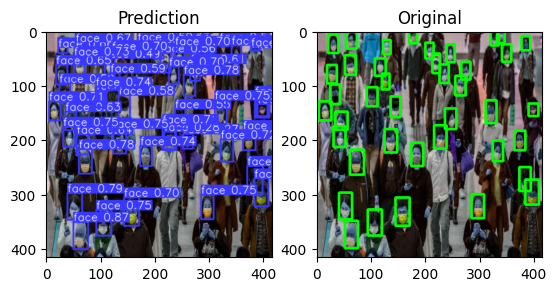


image 1/1 D:\Programming\Projects\Face Detection YOLOv8\notebook\..\data\test\images\Image-from-iOS_MOV-31_jpg.rf.72bb3950a2c1e30e73e4d3eee1cd574d.jpg: 640x640 1 face, 289.0ms
Speed: 11.0ms preprocess, 289.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


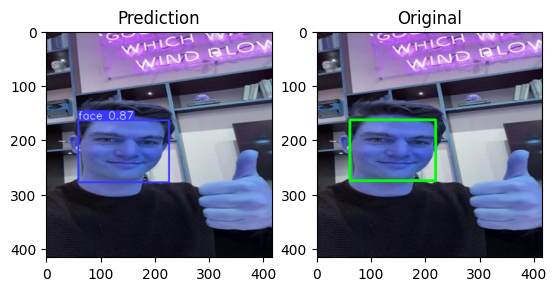


image 1/1 D:\Programming\Projects\Face Detection YOLOv8\notebook\..\data\test\images\r1000019q679o5611r7_jpg.rf.71d82c14215e8c433c94629072025789.jpg: 640x640 1 face, 700.0ms
Speed: 15.0ms preprocess, 700.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


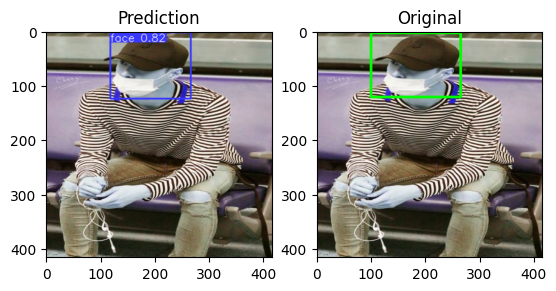

In [46]:
for i in range(4):
    image, label = get_random_data()
    image, label
    
    prediction = model(image)
    
    boxes = []
    image = cv2.imread(image)
    with open(label, 'r') as file:
        for line in file:
                box = line.strip().split(' ')[1:]
                boxes.append(convert_yolo_coord(box))
                image = plot_image(image, boxes)
        
    
    plt.subplot(1, 2, 1)
    plt.imshow(prediction[0].plot())
    plt.title('Prediction')
    
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.title('Original')
    
    plt.show()